# Introduction

**Problem Statement**

Educational institutions need accurate predictive models to identify students at risk of dropping out. This project aims to develop and optimize predictive models to forecast student dropout rates and recommend interventions to improve retention and student success.

The aim of this project is to build an accurate predictor; a machine learning model that predict student dropout, aiming for high accuracy indentify student at the risk of dropping out. Based on the model insight, I also aim to generate actionable recommendation to improve student retention, providing strategies to support at risk students and enhance overall student success.

In the course of this project, I will validate the following hypotheses.
* Higher socio-economic status correlates with lower dropout rates.
* Students with higher admission grades are less likely to drop out.
* Dropout rates are lower among students receiving financial aid or scholarships.

In [254]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import plotly.express as px
pd.set_option('display.max_columns', None)


In [256]:
#Importing Dataset
data = pd.read_csv('data.csv', delimiter=';')
drop_out_df = pd.DataFrame(data)
drop_out_df.sample(5)
drop_out_df.describe()
drop_out_df.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

# Data Cleaning


In [258]:
# refactoring column names
drop_out_df.rename(columns={"Mother's qualification": "Mother_qualification",
                            "Father's qualification": "Father_qualification",
                            "Mother's occupation": "Mother_occupation",
                            "Father's occupation": "Father_occupation",
                            "Nacionality": "Nationality",
                            "Daytime/evening attendance\t": "Daytime_evening_attendance"
                            
                           }, inplace=True)
drop_out_df.columns = drop_out_df.columns.str.replace(' ', '_')
drop_out_df.columns = drop_out_df.columns.str.replace('(', '')
drop_out_df.columns = drop_out_df.columns.str.replace(')', '')

In [259]:
cat_columns = ["Marital_status", "Application_mode", "Application_order",
                "Daytime_evening_attendance", "Previous_qualification",
                "Nationality", "Mother_qualification", "Father_qualification",
                "Mother_occupation", "Father_occupation", "Displaced",
                "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
                "Gender", "Scholarship_holder", "International", "Target"]

num_columns = ["Age_at_enrollment", "Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade",
                "Curricular_units_1st_sem_without_evaluations",
                "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled",
                "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled",
                "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved",
                "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved",
                "Curricular_units_2nd_sem_without_evaluations", "Unemployment_rate", "Inflation_rate",
                "GDP","Course", "Previous_qualification_grade", "Admission_grade"]
# converting categorical columns to type 'category'
drop_out_df[cat_columns] = drop_out_df[cat_columns].astype('category')
drop_out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   int64   
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mother_qualification                          4424 non-null   category
 9   Father_qualification                          4424 n

In [262]:
target_labels = drop_out_df['Target'].value_counts().index

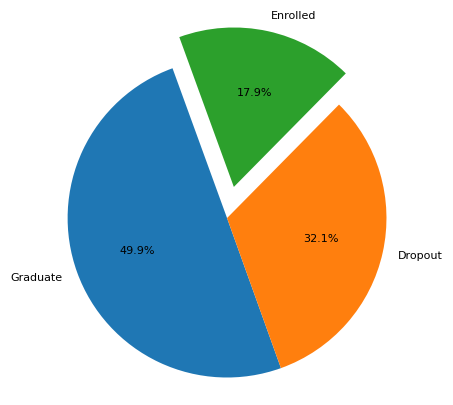

In [265]:
#Visualizing the target class
slices = drop_out_df['Target'].value_counts().values
sizes = slices 
explode = (0, 0, 0.2) 
fig, ax = plt.subplots(figsize=(5,5)) 
ax.pie(sizes, explode=explode, labels=target_labels, autopct='%1.1f%%',        
                                             shadow=False, startangle=110)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Data Transformation
Graduate and Enrolled can be encoded as 0 while Dropout as 1, since we are concerned with drop out rate, we can categorize enrolled and graduate as "not dropout"

In [268]:
drop_out_df['Target'] = drop_out_df['Target'].map({
    'Graduate': 0,
    'Enrolled': 0,
    'Dropout': 1
})
drop_out_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
501,1,17,2,9254,1,1,128.0,1,38,38,9,9,129.1,1,0,0,1,0,0,18,0,0,6,6,6,12.666667,0,0,6,7,5,14.600000,0,11.1,0.6,2.02,0
1782,1,39,1,9500,1,1,130.0,1,37,37,3,7,143.8,0,0,0,1,1,0,27,0,0,8,8,7,15.570000,0,0,8,8,7,15.570000,0,10.8,1.4,1.74,1
130,1,1,3,9500,1,1,138.0,1,19,19,5,8,124.9,1,0,0,1,0,1,18,0,0,7,9,7,13.237500,0,0,8,9,7,13.742857,0,13.9,-0.3,0.79,1
2190,1,17,1,171,1,1,144.0,1,37,37,9,6,129.3,1,0,0,1,1,1,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,7.6,2.6,0.32,0
3940,2,39,1,9147,1,1,120.0,1,37,37,5,5,124.6,0,0,0,1,0,0,36,0,0,5,8,3,11.000000,0,0,5,12,4,13.375000,0,10.8,1.4,1.74,0


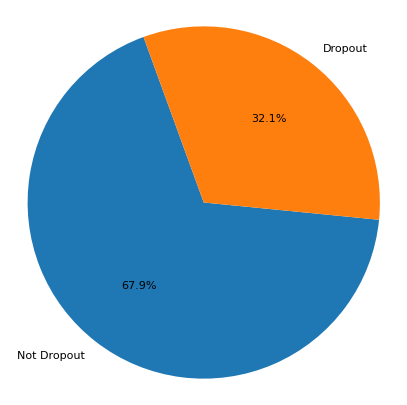

In [270]:
#Visualizing the target class after encoding
slices = drop_out_df['Target'].value_counts().values
sizes = slices 
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs') 
fig, ax = plt.subplots(figsize=(5,5)) 
ax.pie(sizes, explode=explode, labels=['Not Dropout', 'Dropout'], autopct='%1.1f%%',        
                                             shadow=False, startangle=110)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Checking for Skewness in Numerical Data

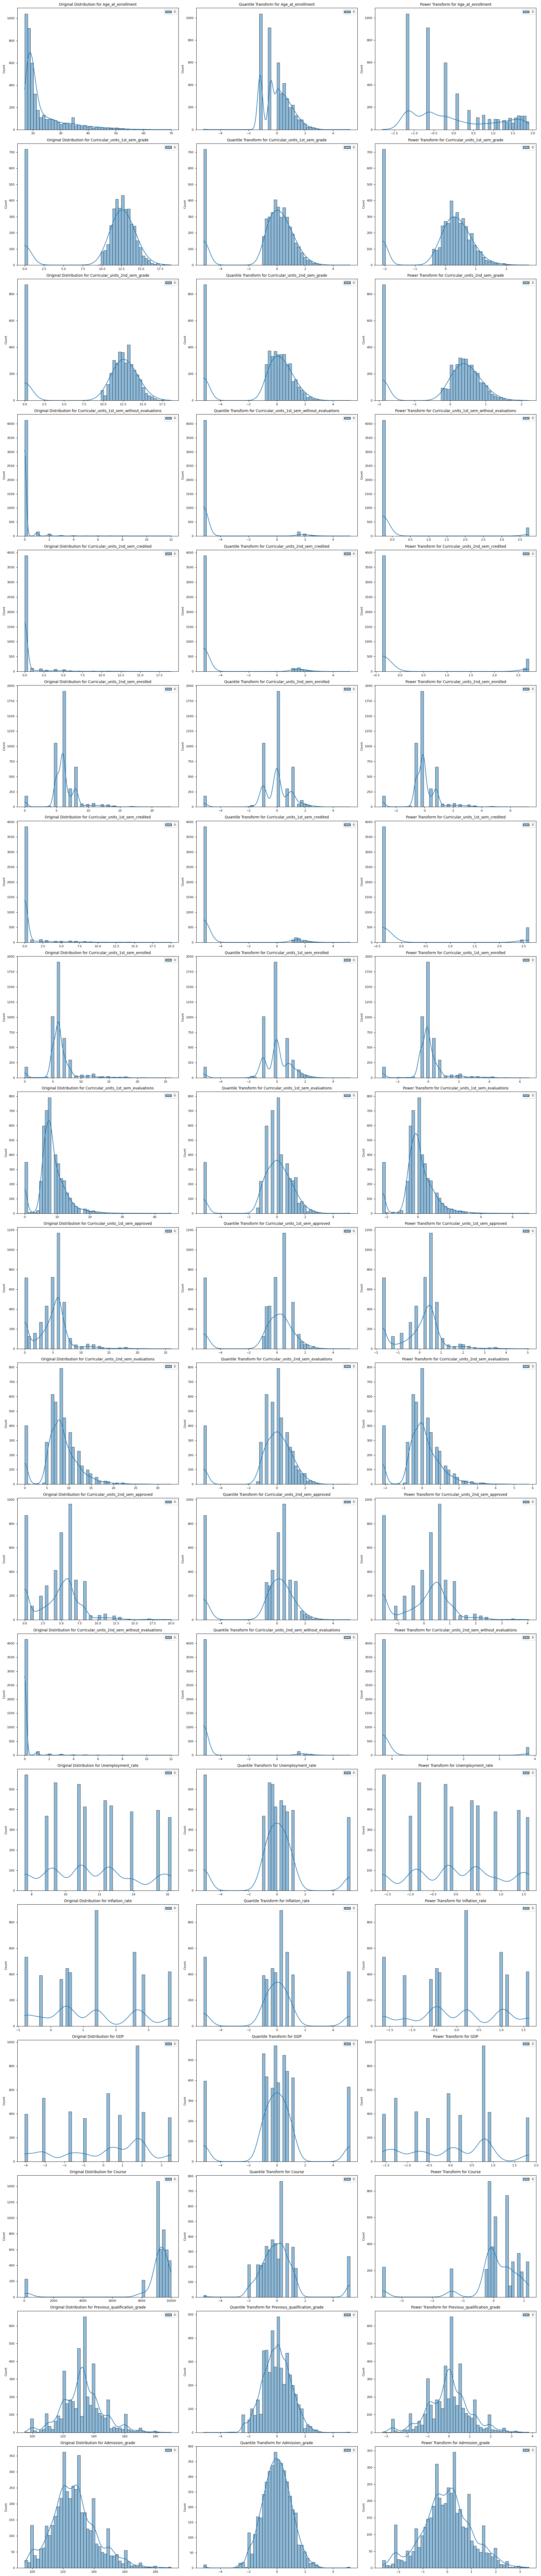

In [235]:
def test_transformers(columns, df):
    """
        To test each type of transformation
    """
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    
    num_features = len(columns)
    num_plots_per_feature = 3
    num_total_plots = num_features * num_plots_per_feature
    
    num_rows = (num_total_plots + 2) // 3 
    num_cols = 3
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    for j, i in enumerate(columns):
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        
        # Original Distribution
        sns.histplot(array, bins=50, kde=True, ax=axes[j * num_plots_per_feature])
        axes[j * num_plots_per_feature].set_title(f"Original Distribution for {i}")
        
        # Quantile Transformation
        sns.histplot(x, bins=50, kde=True, ax=axes[j * num_plots_per_feature + 1])
        axes[j * num_plots_per_feature + 1].set_title(f"Quantile Transform for {i}")
        
        # Power Transformation
        sns.histplot(y, bins=50, kde=True, ax=axes[j * num_plots_per_feature + 2])
        axes[j * num_plots_per_feature + 2].set_title(f"Power Transform for {i}")

    # Hide any unused subplots
    for k in range(num_total_plots, len(axes)):
        axes[k].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and column names
test_transformers(num_columns, drop_out_df.iloc[:, :-1])

#### Transforming the skewed numerical data
***Quatile transformation performs better that power transformation in transforming the data to a normal distributed data***

In [237]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
drop_out_df[num_columns] = qt.fit_transform(drop_out_df[num_columns])

In [238]:
# International and Nationality both refers to same feature, therefore we can drop one for the other
# Dropping nationality
# drop_out_df.drop('Nationality', axis=1, inplace=True)

### Heat map

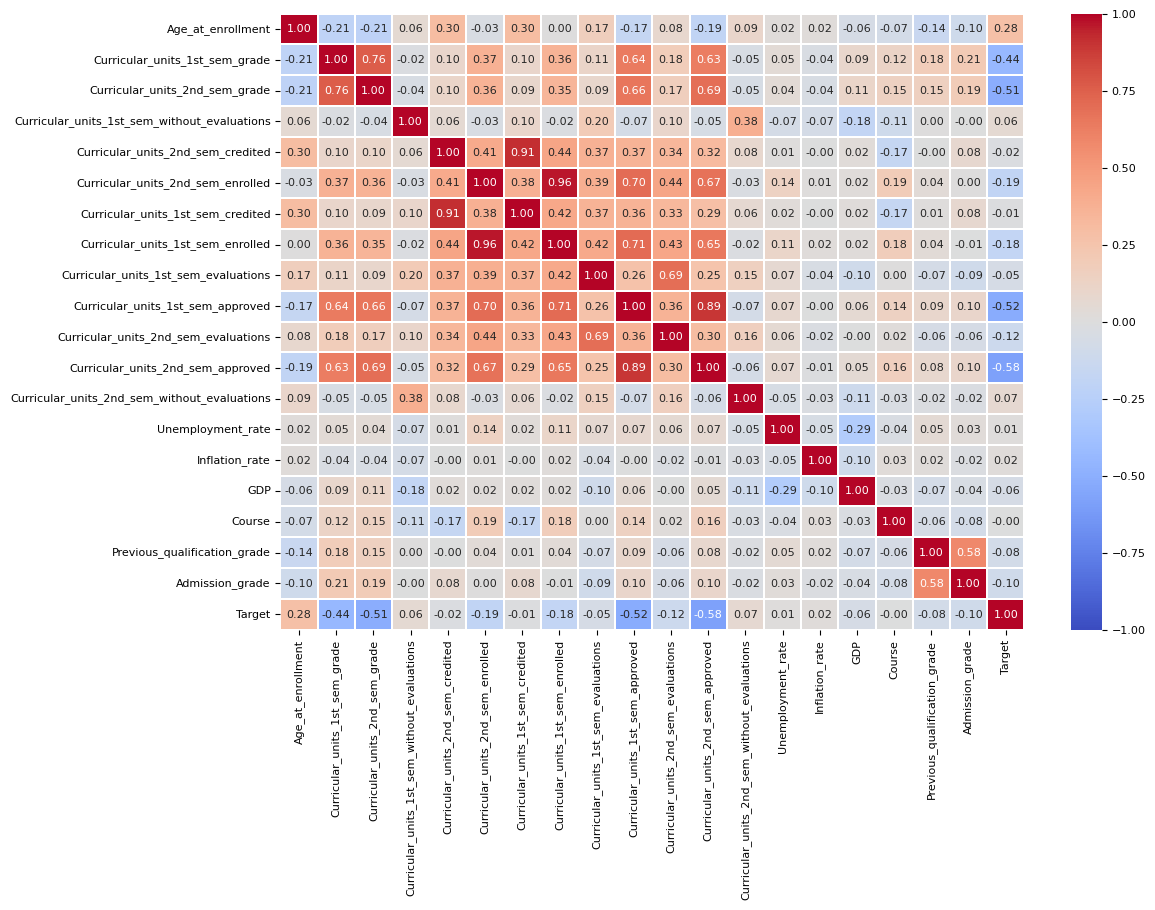

In [273]:
#Visualize using a heatmap
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(drop_out_df[num_columns + ['Target']].corr(method = 'spearman'), 
                 cmap = 'coolwarm', annot = True, fmt = '.2f', 
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

## Correlation Analysis

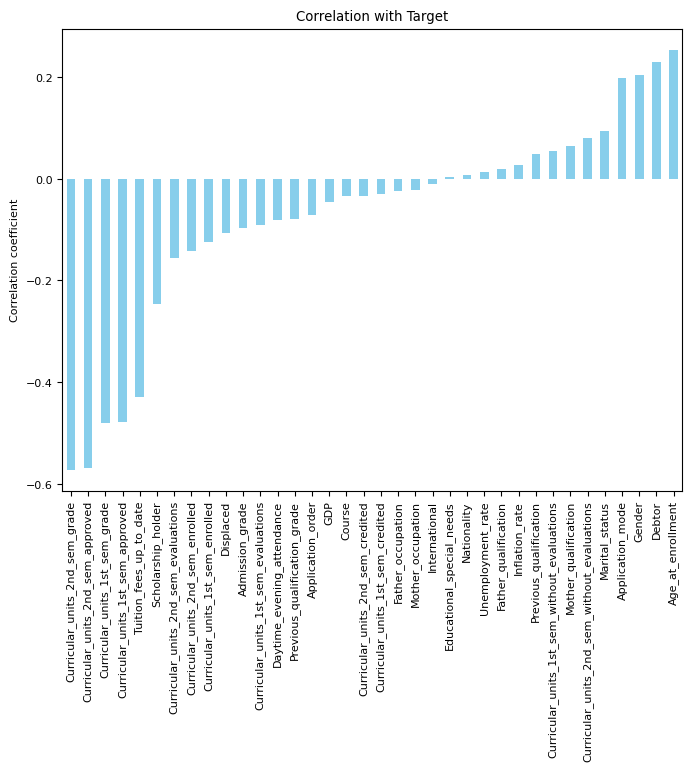

In [275]:
# Correlation of all features with the 'Target' column
correlation_with_target = drop_out_df.corr()['Target'].sort_values()

#Bar plot of the correlations
plt.figure(figsize=(8, 6))
correlation_with_target.drop('Target').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target')
plt.ylabel('Correlation coefficient')
plt.show()
#chart showed that curricular grades for both semester and tuition fees have a strong correlation with the Target

__From the correlation chart, average curricular units for grade and approved show the strongest correlation. This is insightful as the average grades are vital for promotion. Tution fees and financial aid also show a negative correlation, which indicate that an updated tuition fee can less likely lead to drop out, same with financial aid. Age and debt show a slight positive correlation__

In [276]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px

# Defining custom bins and labels
bins = [16, 19, 35, 80]  # Bin edges (upper bound is exclusive except for the last)
labels = ["Teens (16 -19)", "Young Adult (20 - 40)", "Adults (41 - 80)"]  # Custom labels

# Binning the 'Age_at_enrollment' column with custom bins
drop_out_df['Binned_Age'] = pd.cut(drop_out_df['Age_at_enrollment'], bins=bins, labels=labels, right=True)

# Ordinal encoding with the exact defined order matching the bins' labels
category_order = [["Teens (16 -19)", "Young Adult (20 - 40)", "Adults (41 - 80)"]]
encoder = OrdinalEncoder(categories=category_order)
drop_out_df['Age_encoded'] = encoder.fit_transform(drop_out_df[['Binned_Age']])

# Grouping by 'Binned_Age' and 'Dropout' status to get counts
grouped_df = drop_out_df.groupby(['Binned_Age', 'Target']).size().reset_index(name='Count')

# Creating a grouped bar chart with Plotly
fig = px.bar(grouped_df, 
             x='Binned_Age', 
             y='Count', 
             color='Target', 
             barmode='group', 
             labels={'Binned_Age': 'Age Group', 'Count': 'Number of Students', 'Target': 'Dropout Status'},
             title='Dropout Rates by Age Group')

# Display the plot
fig.show()


In [280]:
drop_out_df['avg_curr_credited'] = drop_out_df[['Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited']].mean(axis = 1)
drop_out_df['avg_curr_enrolled'] = drop_out_df[['Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
drop_out_df['avg_curr_evaluations'] = drop_out_df[['Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
drop_out_df['avg_curr_approved'] = drop_out_df[['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']].mean(axis = 1)
drop_out_df['avg_curr_grade'] = drop_out_df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean(axis = 1)
drop_out_df['avg_curr_without_evaluations'] = drop_out_df[['Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

In [282]:
col_drop = ['Curricular_units_1st_sem_credited',
                    'Curricular_units_1st_sem_enrolled',             
                    'Curricular_units_1st_sem_evaluations',            
                    'Curricular_units_1st_sem_approved',               
                    'Curricular_units_1st_sem_grade',                  
                    'Curricular_units_1st_sem_without_evaluations',  
                    'Curricular_units_2nd_sem_credited',               
                    'Curricular_units_2nd_sem_enrolled',               
                    'Curricular_units_2nd_sem_evaluations',            
                    'Curricular_units_2nd_sem_approved',               
                    'Curricular_units_2nd_sem_grade',                  
                    'Curricular_units_2nd_sem_without_evaluations']
drop_out_df.drop(col_drop, axis=1, inplace=True)

In [284]:
for col in col_drop:
    num_columns.remove(col)
    
num_columns.extend(['avg_curr_credited','avg_curr_enrolled',
                    'avg_curr_evaluations', 'avg_curr_approved',
                    'avg_curr_grade', 'avg_curr_without_evaluations'])

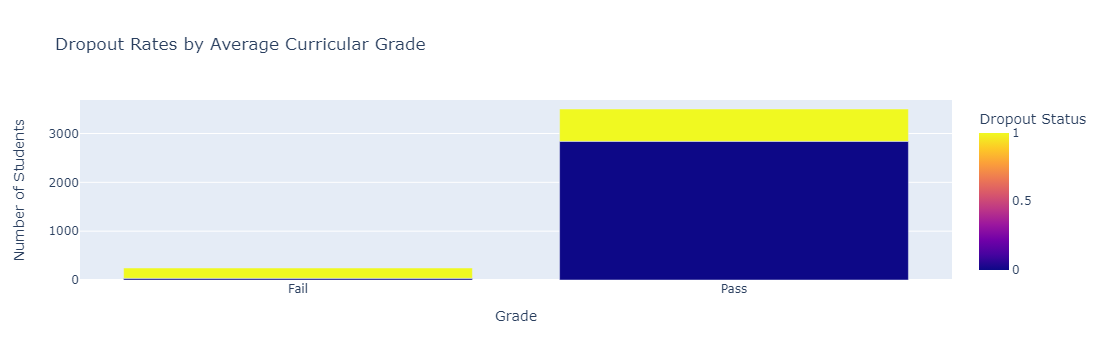

In [286]:
# Defining custom bins and labels
bins = [0, 10, 20]  # Bin edges (upper bound is exclusive except for the last)
labels = ["Fail", "Pass"]  # Custom labels

# Binning the 'Age_at_enrollment' column with custom bins
drop_out_df['Binned_avg_curr_grade'] = pd.cut(drop_out_df['avg_curr_grade'], bins=bins, labels=labels, right=True)

# Grouping by 'Binned_Age' and 'Dropout' status to get counts
grouped_df = drop_out_df.groupby(['Binned_avg_curr_grade', 'Target']).size().reset_index(name='Count')

# Creating a grouped bar chart with Plotly
fig = px.bar(grouped_df, 
             x='Binned_avg_curr_grade', 
             y='Count', 
             color='Target', 
             barmode='group', 
             labels={'Binned_avg_curr_grade': 'Grade', 'Count': 'Number of Students', 'Target': 'Dropout Status'},
             title='Dropout Rates by Average Curricular Grade')

# Display the plot
fig.show()

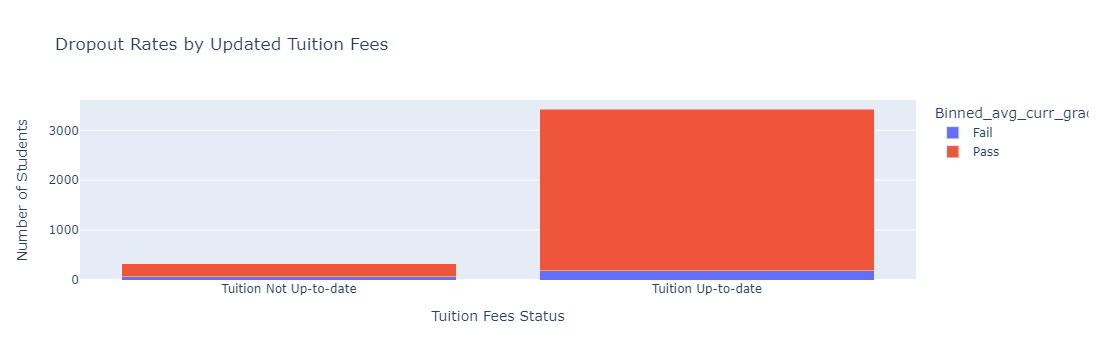

In [304]:
# Mapping original values to custom labels
tuition_fee_mapping = {0: 'Tuition Not Up-to-date', 1: 'Tuition Up-to-date'}

# Creating a stacked bar chart with Plotly
fig = px.bar(grouped_df, 
             x='Tuition_fees_up_to_date', 
             y='Count', 
             color='Binned_avg_curr_grade', 
             barmode='stack',
             labels={'Tuition_fees_up_to_date': 'Tuition Fees Status', 'Count': 'Number of Students', 'Target': 'Dropout Status'},
             title='Dropout Rates by Updated Tuition Fees',
             category_orders={"Tuition_fees_up_to_date": ['Tuition Not Up-to-date','Tuition Up-to-date']}
             )

# Update the x-axis labels based on the mapping
fig.update_xaxes(tickvals=[0, 1], ticktext=['Tuition Not Up-to-date', 'Tuition Up-to-date'])

# Display the plot
fig.show()


#### Box plot for numerical columns

In [397]:
# for col in numerical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=drop_out_df[col])
#     plt.title(f'Box Plot of {col}')
#     plt.show()

# Hypothesis Testing

#### Chi-Square Tests for Categorical Variables

In [400]:
from scipy.stats import chi2_contingency

p_values = []
for col in cat_columns:
    crosstable = pd.crosstab(index = drop_out_df[col], 
                             columns = drop_out_df['Target'])
    p = chi2_contingency(crosstable)[1]
    p_values.append(p)

chi2_result = pd.DataFrame({
    'Feature': cat_columns,
    'P_value': [round(el, 6) for el in p_values]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Feature,P_value
0,Marital_status,0.000000
15,Scholarship_holder,0.000000
14,Gender,0.000000
13,Tuition_fees_up_to_date,0.000000
12,Debtor,0.000000
10,Displaced,0.000000
9,Father_occupation,0.000000
8,Mother_occupation,0.000000
6,Mother_qualification,0.000000
4,Previous_qualification,0.000000


* The very low p-value indicates that the difference in dropout rates between students with higher and lower admission grades is significant. It suggests that students with higher admission grades are less likely to drop out(Higher admission grades are indeed correlated with a lower likelihood of dropping out.).
* There is a highly significant correlation between scholarship holders and dropout rates. The extremely low p-value confirms that the difference in dropout rates between students who receive financial aid and those who do not is very unlikely to be due to chance(There is a significant association between receiving financial aid and dropout rates, suggesting that students receiving financial aid are less likely to drop out.).
* Previous qualification, Father's and Mother's qualification, Father's and Mother's occupation, and debt, all which influence the socio-economic status, do show significant differences in dropout rates based on their p-values. This suggests that these features might have a strong impact on dropout rates.
* International, Nationality and Educational special needs, have a high p-value and also show no correlation in the correlation plotted previously, therefore we would consider dropping them.

In [402]:
drop_out_df.drop(['International', 'Nationality', 'Educational_special_needs'], axis=1, inplace=True)
drop_out_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Unemployment_rate,Inflation_rate,GDP,Target,avg_curr_credited,avg_curr_enrolled,avg_curr_evaluations,avg_curr_approved,avg_curr_grade,avg_curr_without_evaluations
0,1,17,5,-1.925969,1,1,-0.815424,19,12,5,9,0.100636,1,0,1,1,0,0.022607,-0.272066,0.215139,0.421559,1,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,1,15,1,0.100636,1,1,1.824105,1,3,3,3,1.134671,1,0,0,1,0,-0.416076,0.787718,-0.972783,0.151274,0,-5.199338,-0.003768,-0.783303,0.497058,0.965464,-5.199338
2,1,1,5,-0.944940,1,1,-0.815424,37,37,9,9,-0.093065,1,0,0,1,0,-0.416076,-0.272066,0.215139,0.421559,1,-5.199338,-0.003768,-5.199338,-5.199338,-5.199338,-5.199338
3,1,17,2,1.074575,1,1,-0.815424,38,37,5,3,-0.545848,1,0,1,0,0,0.022607,-0.608153,-5.199338,-1.039446,0,-5.199338,-0.003768,0.361268,0.247208,0.401088,-5.199338
4,2,39,1,-1.438471,0,1,-2.325597,37,38,9,9,1.097220,0,0,1,0,0,1.910163,0.787718,-0.972783,0.151274,0,-5.199338,-0.003768,-0.170466,0.219668,0.239793,-5.199338


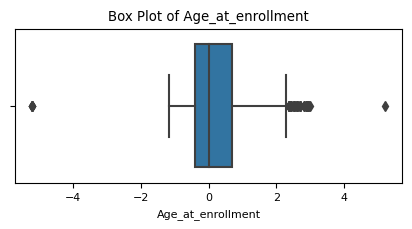

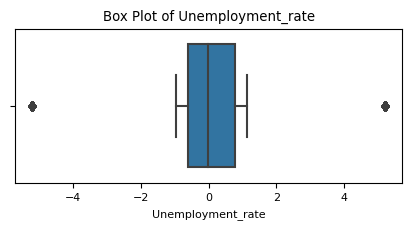

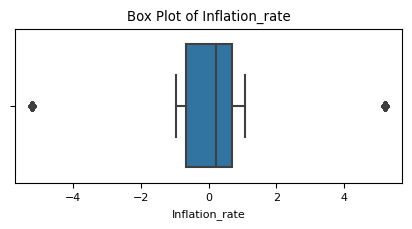

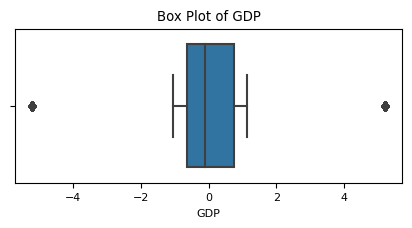

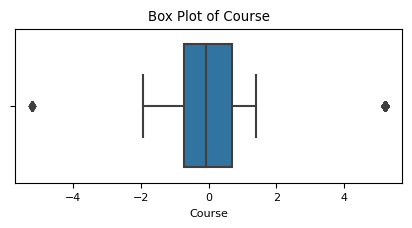

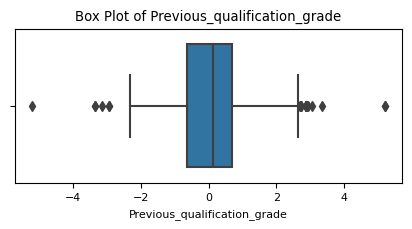

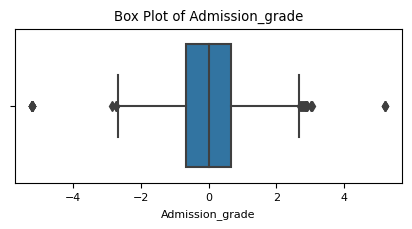

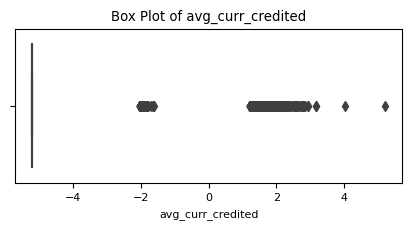

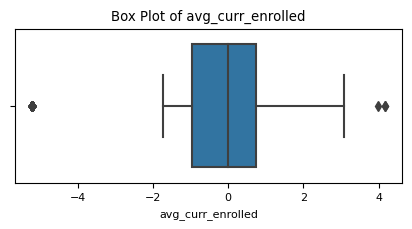

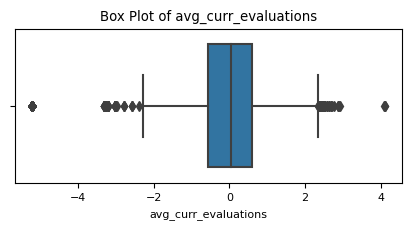

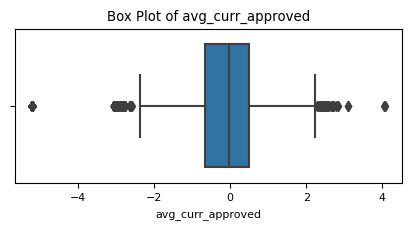

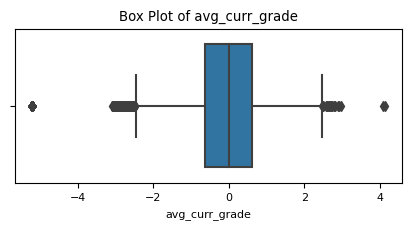

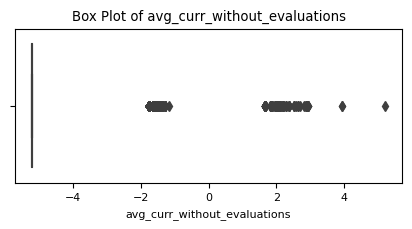

In [403]:
for col in num_columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=drop_out_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [404]:
# for col in num_columns:
#     Q1 = drop_out_df[col].quantile(0.25)
#     Q3 = drop_out_df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Cap the outliers
#     drop_out_df[col] = np.where(drop_out_df[col] < lower_bound, lower_bound, drop_out_df[col])
#     drop_out_df[col] = np.where(drop_out_df[col] > upper_bound, upper_bound, drop_out_df[col])
#     drop_out_df[col] = drop_out_df[col].apply(np.log1p)

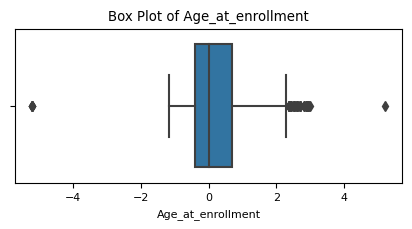

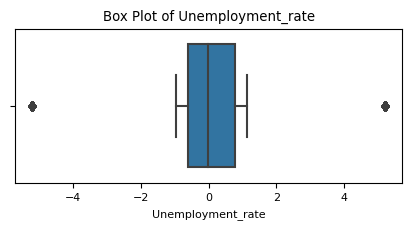

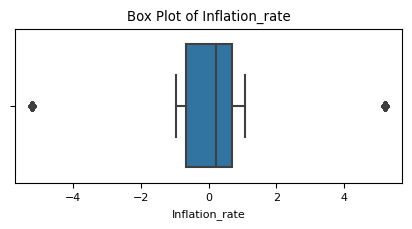

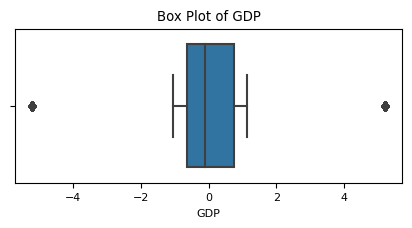

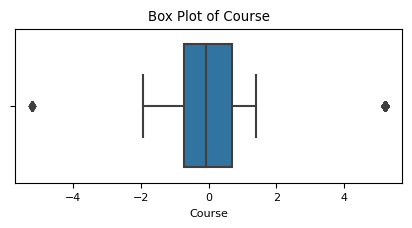

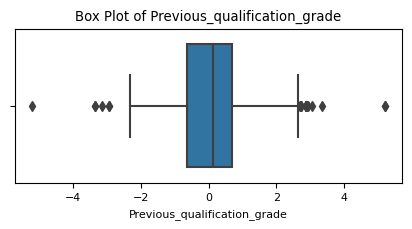

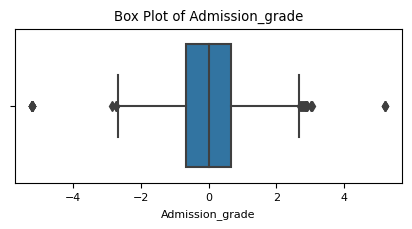

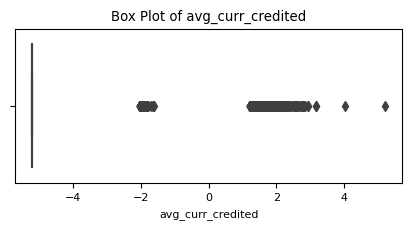

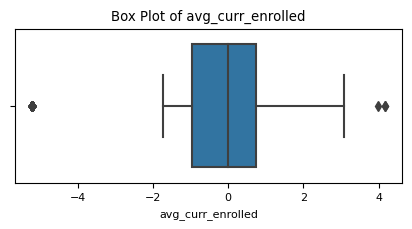

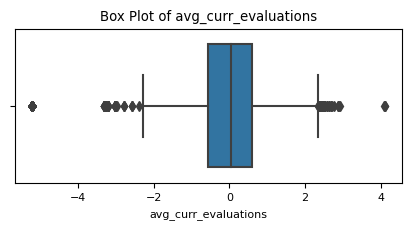

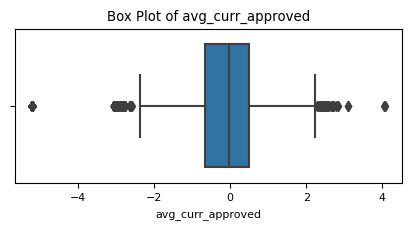

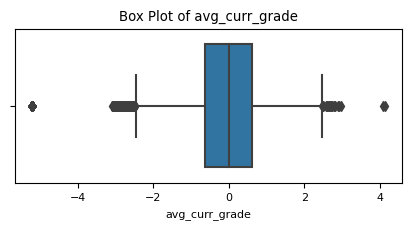

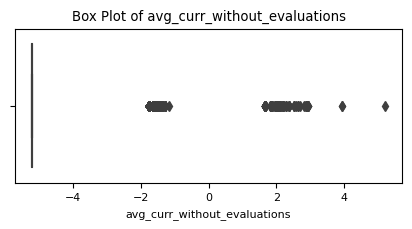

In [405]:
for col in num_columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=drop_out_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [406]:
drop_out_df.isnull().sum()

Marital_status                  0
Application_mode                0
Application_order               0
Course                          0
Daytime_evening_attendance      0
Previous_qualification          0
Previous_qualification_grade    0
Mother_qualification            0
Father_qualification            0
Mother_occupation               0
Father_occupation               0
Admission_grade                 0
Displaced                       0
Debtor                          0
Tuition_fees_up_to_date         0
Gender                          0
Scholarship_holder              0
Age_at_enrollment               0
Unemployment_rate               0
Inflation_rate                  0
GDP                             0
Target                          0
avg_curr_credited               0
avg_curr_enrolled               0
avg_curr_evaluations            0
avg_curr_approved               0
avg_curr_grade                  0
avg_curr_without_evaluations    0
dtype: int64

# Modelling

In [425]:
drop_out_df.drop(['avg_curr_credited', 'avg_curr_evaluations'], axis = 1, inplace=True)

In [427]:
y = drop_out_df['Target'].values
drop_out_df_copy = drop_out_df.copy()
X = drop_out_df_copy.drop('Target', axis = 1).values

In [429]:
np.mean(y), np.mean(1-y) #shows that 67.8% did not drop out, so we can achieve an accuracy of 67.8% without any model

(0.3212025316455696, 0.6787974683544303)

In [431]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)


In [433]:
from sklearn.model_selection import train_test_split
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11111)

_Without balancing the data, the model achieved high accuracy but poor recall on the minority class (drop out), this indicates an imbalance data._

In [436]:
np.mean(y), np.mean(1-y)

(0.5, 0.5)

In [438]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [440]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [442]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score, roc_auc_score, accuracy_score
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
rf_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
rf_f1score = round(f1_score(y_test, y_pred), 3)
rf_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('Random Forest Baseline Performance:')
print('Balanced Accuracy:', rf_accuracy)
print('F1 Score:', rf_f1score)
print('AUC score:', rf_auc)

Random Forest Baseline Performance:
Balanced Accuracy: 0.892
F1 Score: 0.888
AUC score: 0.952


In [482]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_random = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

rsv_rf = RandomizedSearchCV(estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                                param_distributions = param_random, scoring = 'balanced_accuracy', 
                                n_iter = 30, n_jobs = -1,  random_state = 0)

rsv_rf.fit(X_train, y_train)  

# Get the best estimator
tuned_rf = rsv_rf.best_estimator_

# Check the model performance
y_pred = tuned_rf.predict(X_test)
y_prob = tuned_rf.predict_proba(X_test)

tuned_rf_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
tuned_rf_f1score = round(f1_score(y_test, y_pred), 3)
tuned_rf_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('tuned_rf_bi Performance:')
print('Balanced Accuracy:', tuned_rf_accuracy)
print('F1 Score:', tuned_rf_f1score)
print('AUC score:', tuned_rf_auc)

tuned_rf_bi Performance:
Balanced Accuracy: 0.864
F1 Score: 0.858
AUC score: 0.929


In [484]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
y_prob = xgb_classifier.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
xgb_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
xgb_f1score = round(f1_score(y_test, y_pred), 3)
xgb_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('XGB Baseline Performance:')
print('Balanced Accuracy:', xgb_accuracy)
print('F1 Score:', xgb_f1score)
print('AUC score:', xgb_auc)

XGB Baseline Performance:
Balanced Accuracy: 0.905
F1 Score: 0.903
AUC score: 0.96


In [492]:
range (5, 0, -1)
param_xgb = {'max_depth': range (2, 10, 1),
            'n_estimators': range(60, 200, 20),
            'learning_rate': [0.008, 0.01, 0.05, 0.1]
            }

grid_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_xgb, n_jobs=-1)

grid_xgb.fit(X_train, y_train)

# Get the best_estimator
tuned_xgb = grid_xgb.best_estimator_

# Check the model performance
y_pred = tuned_xgb.predict(X_test)
y_prob = tuned_xgb.predict_proba(X_test)

tuned_xgb_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
tuned_xgb_f1score = round(f1_score(y_test, y_pred, average = 'macro'), 3)

print('Tuned XGBoost performance:')
print('Balanced accuracy:', tuned_xgb_accuracy)
print('F1 score:', tuned_xgb_f1score)
print('Best score score:', grid_xgb.best_score_)
print(grid_search.best_params_)

Tuned XGBoost performance:
Balanced accuracy: 0.908
F1 score: 0.908
Best score score: 0.9088221904266389
{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 25}


In [494]:
from sklearn.ensemble import VotingClassifier

# Combine best models into VotingClassifer 
vc_soft = VotingClassifier(estimators = [('rf', rf_classifier), ('xgb', grid_xgb)], voting = 'soft')
vc_soft.fit(X_train, y_train)

y_pred = vc_soft.predict(X_test)
y_prob = vc_soft.predict_proba(X_test)

vc_soft_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
vc_soft_f1score = round(f1_score(y_test, y_pred), 3)
vc_soft_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('vc_soft performance:')
print('Balanced accuracy:', vc_soft_accuracy)
print('F1 score:', vc_soft_f1score)
print('AUC score:', vc_soft_auc)

vc_soft performance:
Balanced accuracy: 0.907
F1 score: 0.904
AUC score: 0.962


In [500]:
import shap
masker = shap.maskers.Independent(data = X_test)
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
explainer = shap.LinearExplainer(model, masker=masker)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X, feature_names=drop_out_df.columns, plot_type='bar')

NameError: name 'LogisticRegression' is not defined

In [504]:
#import Keras for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#Build ANN
model = tf.keras.Sequential([
tf.keras.layers.Dense(16, activation=tf.nn.relu, input_dim=4),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
# Configuration of the learning process
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# 50 runs
model.fit(X_train, y_train, epochs=50)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

In [321]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(drop_out_df[num_columns])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


KeyError: "['avg_curr_credited', 'avg_curr_evaluations'] not in index"

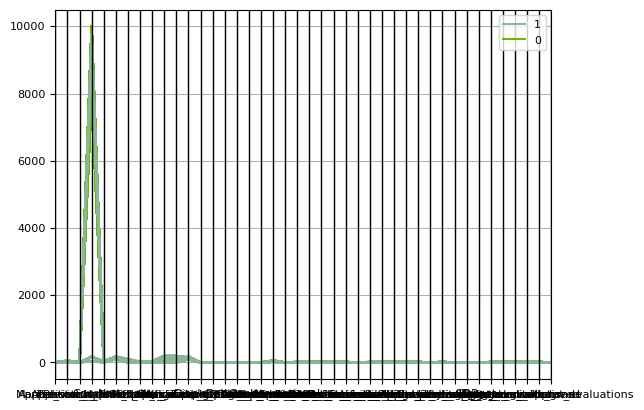

In [314]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Ensure categorical_columns is a single column name
# Example: If categorical_columns is a list, select the appropriate column name
class_column_name = cat_columns[3]  # Replace with the correct column name if needed

parallel_coordinates(drop_out_df, class_column=class_column_name)
plt.show()


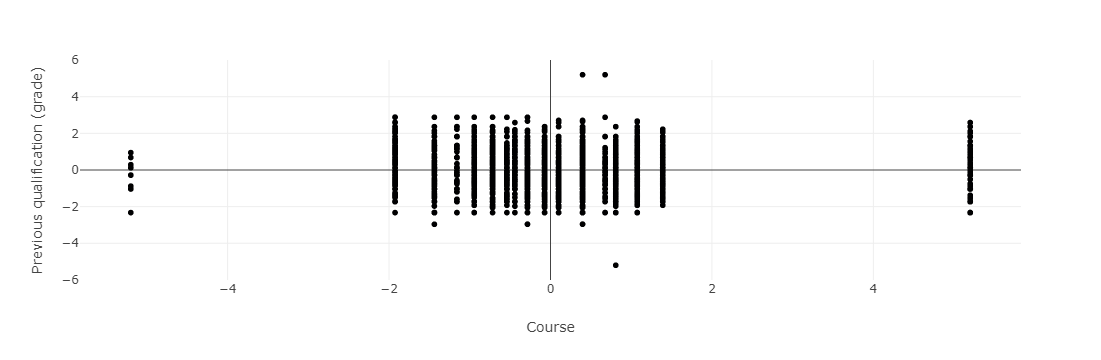

In [340]:
import plotly.express as px

numerical_columns = ["Course", "Previous qualification (grade)", "Admission grade",
                     "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]

fig = px.scatter(drop_out_df, x='Course', y='Previous qualification (grade)')
fig.show()


2024-09-17 22:39:33.199 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:39:33.514 
  command:

    streamlit run C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-17 22:39:33.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:39:33.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:39:33.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:39:33.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 22:39:33.519 Session state does not function when running a script without `streamlit run`
2024-09-17 22:39:33.519 Thread 'MainThread': missing ScriptRunContext! T

DeltaGenerator()

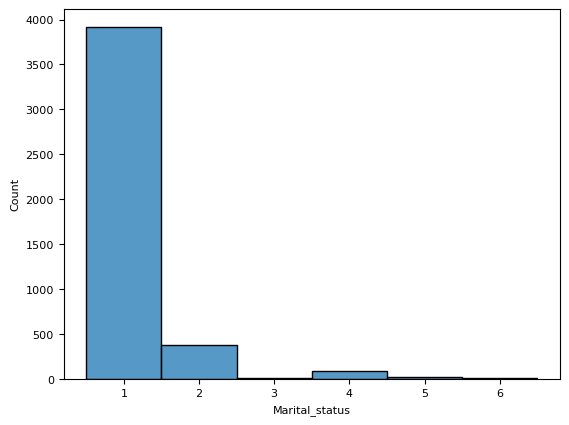

In [316]:
# Save this code in a file, e.g., `app.py`
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.title('Data Exploration Dashboard')

# Add a histogram
selected_column = st.selectbox('Course', drop_out_df.columns)
fig, ax = plt.subplots()
sns.histplot(drop_out_df[selected_column], ax=ax)
st.pyplot(fig)

# Run with: streamlit run app.py


In [97]:
drop_out_df.to_csv('Cleaned_Transformed_Dataset.csv', index=False)

### Univariate Analysis

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(drop_out_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Box Plots


#### Visualize using a heatmap

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [99]:
X = drop_out_df.iloc[:, :-1].values
y = drop_out_df['Target'].values

Target
0    3003
1    1421
Name: count, dtype: int64


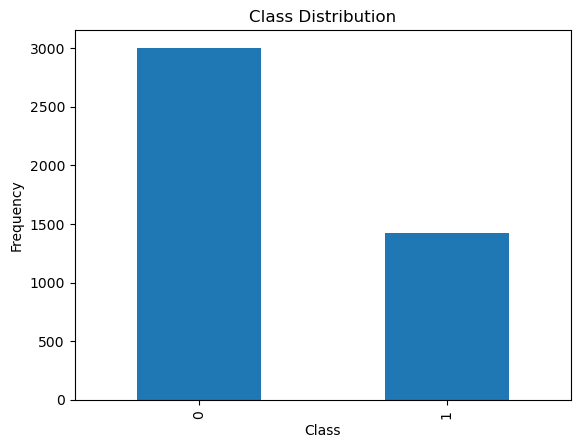

In [146]:

# Assuming 'target' is the column with the class labels
class_counts = drop_out_df['Target'].value_counts()
print(class_counts)

class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print('Gen:', round(raw_df['Class'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['Class'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

In [101]:
np.mean(y), np.mean(1-y)

(0.3212025316455696, 0.6787974683544303)

***The result show that the dataset is imbalanced, which might affect the performance of some models. Models might favor the majority class (in this case, the "no drop out" class), so we can achieve an accuracy of 67.8% without any model***

## Balancing the Data using SMOTE

In [148]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [150]:
np.mean(y), np.mean(1-y)

(0.5, 0.5)

***Shows that the dataset is balanced***

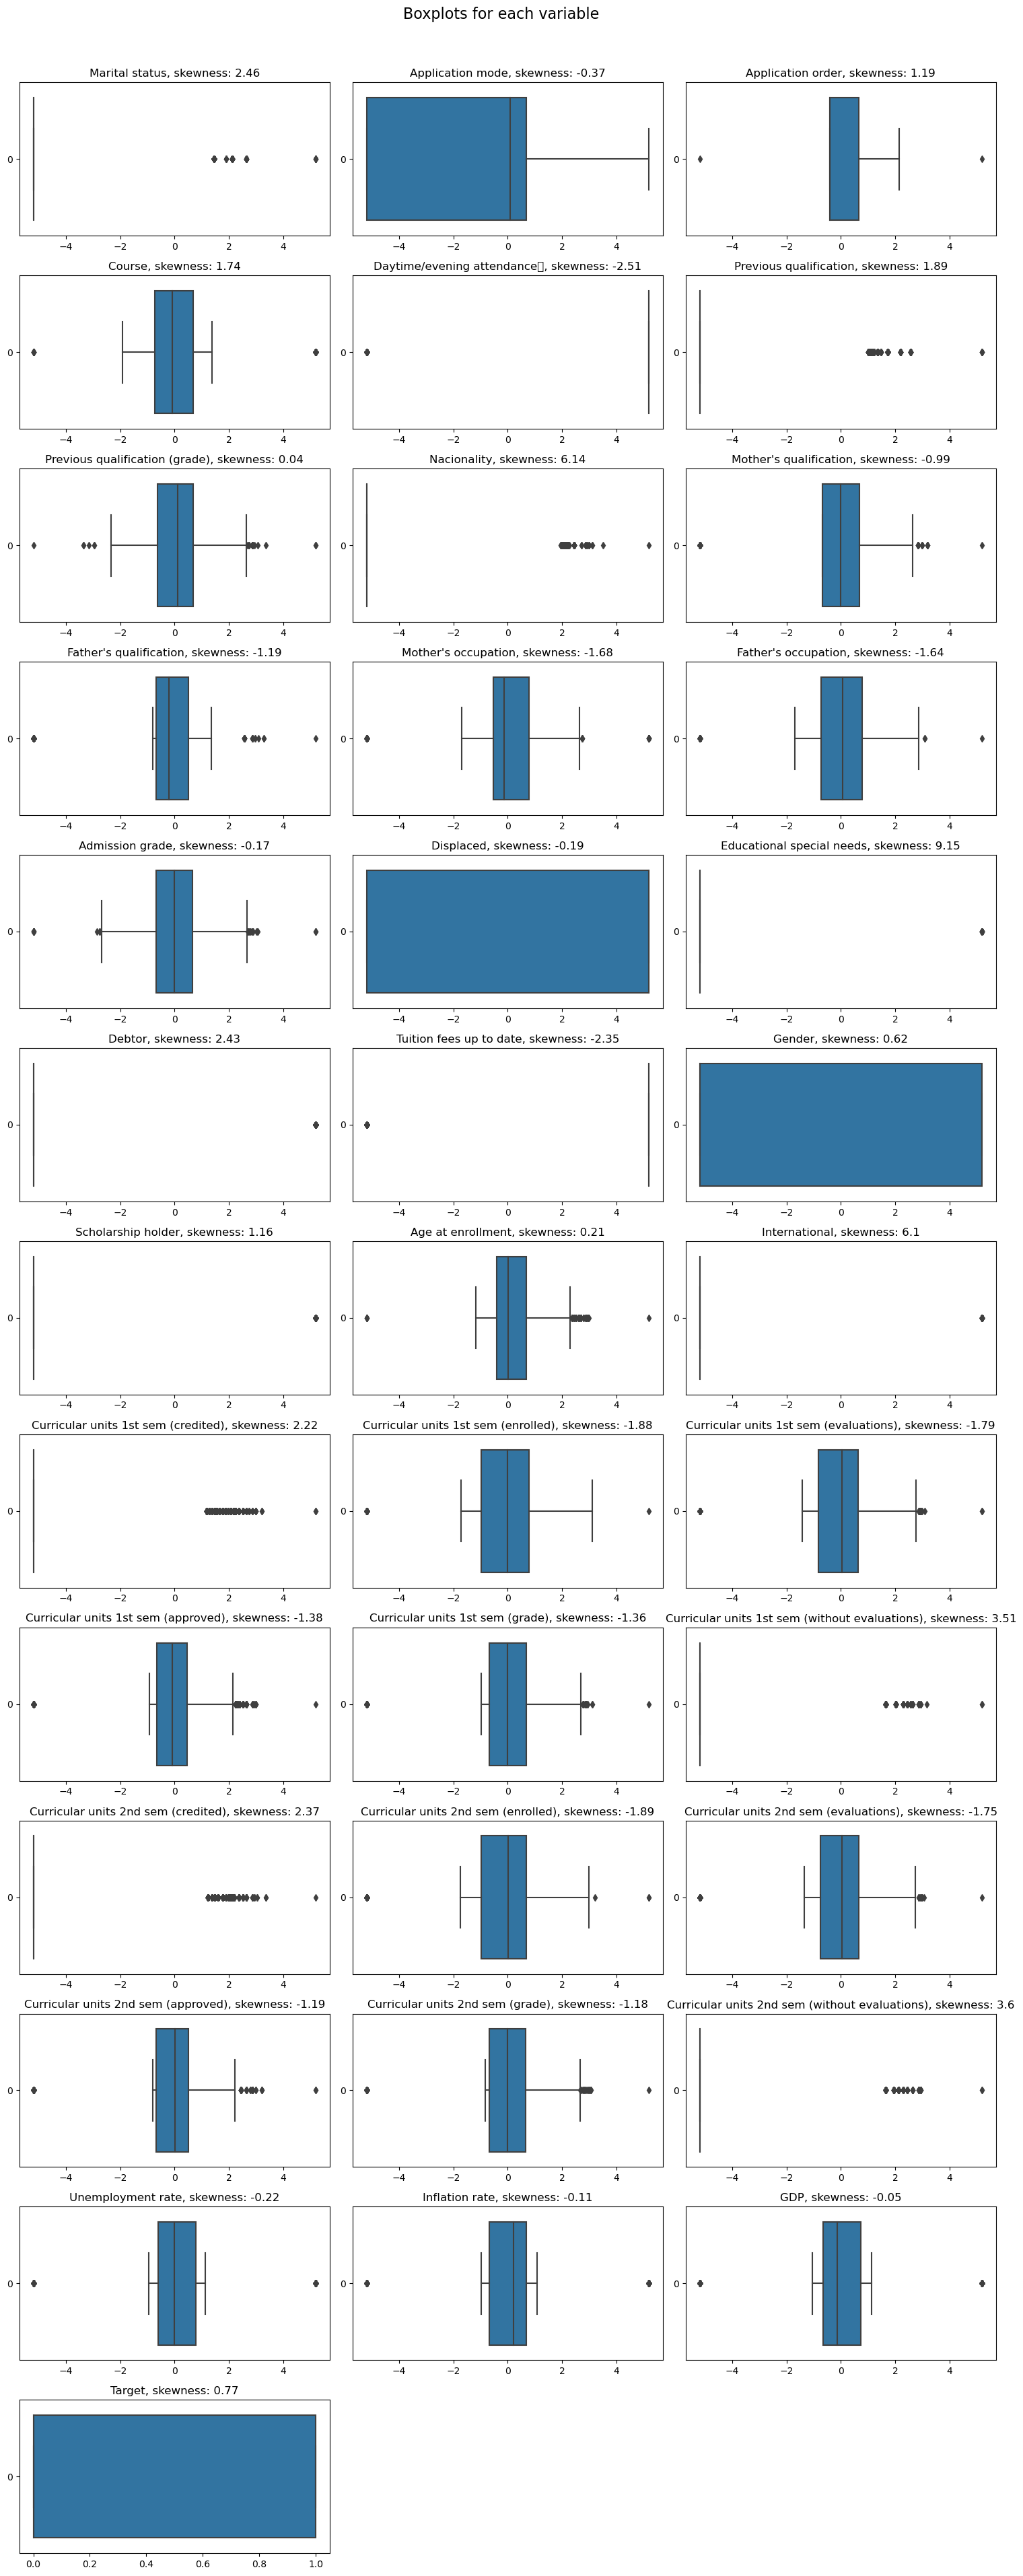

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def boxplots_custom(dataset, columns_list, cols=3, suptitle=''):
    # Calculate the number of rows needed
    num_plots = len(columns_list)
    rows = math.ceil(num_plots / cols)
    
    # Create the subplots
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3))
    fig.suptitle(suptitle, fontsize=16)
    
    # Flatten the axs array to iterate over it easily
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the subtitle
    plt.show()

# Example usage of the function
boxplots_custom(dataset=transformed_df, columns_list=transformed_df.columns, cols=3, suptitle='Boxplots for each variable')
